In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import scipy as sp
import statsmodels.api
from statsmodels.formula.api import ols
from sklearn.decomposition import FactorAnalysis

In [2]:
df = pd.read_csv('digital_literacy_dataset.csv')
df.head()

,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,43,Male,Primary,Student,Medium,Semi-Rural,25,1,33,...,7,15.85,92,12,Low,77,4,51,Yes,58.2
1,U0002,60,Female,High School,Farmer,Low,Rural,22,14,35,...,9,22.24,88,24,Low,76,4,98,Yes,55.3
2,U0003,47,Female,Primary,Farmer,Low,Semi-Rural,14,31,14,...,13,12.15,67,17,Low,67,5,75,Yes,52.3
3,U0004,34,Female,Secondary,Farmer,Low,Rural,6,32,17,...,8,25.59,69,28,Medium,59,1,61,Yes,55.5
4,U0005,50,Male,High School,Other,Medium,Rural,14,41,19,...,8,16.65,76,10,Medium,90,4,82,No,59.3


In [3]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Education_Level', 'Employment_Status',
       'Household_Income', 'Location_Type', 'Basic_Computer_Knowledge_Score',
       'Internet_Usage_Score', 'Mobile_Literacy_Score',
       'Post_Training_Basic_Computer_Knowledge_Score',
       'Post_Training_Internet_Usage_Score',
       'Post_Training_Mobile_Literacy_Score', 'Modules_Completed',
       'Average_Time_Per_Module', 'Quiz_Performance', 'Session_Count',
       'Engagement_Level', 'Adaptability_Score', 'Feedback_Rating',
       'Skill_Application', 'Employment_Impact', 'Overall_Literacy_Score'],
      dtype='object')

In [4]:
df = df.set_index('User_ID')

In [5]:
df.isnull().sum()

Age                                               0
Gender                                            0
Education_Level                                 212
Employment_Status                                 0
Household_Income                                  0
Location_Type                                     0
Basic_Computer_Knowledge_Score                    0
Internet_Usage_Score                              0
Mobile_Literacy_Score                             0
Post_Training_Basic_Computer_Knowledge_Score      0
Post_Training_Internet_Usage_Score                0
Post_Training_Mobile_Literacy_Score               0
Modules_Completed                                 0
Average_Time_Per_Module                           0
Quiz_Performance                                  0
Session_Count                                     0
Engagement_Level                                  0
Adaptability_Score                                0
Feedback_Rating                                   0
Skill_Applic

In [6]:
df[df['Education_Level'].isnull()]

,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
User_ID,,,,,,,,,,,,,,,,,,,,,
U0011,28,Male,NaN,Other,Low,Rural,40,19,50,79,...,14,20.05,89,16,Low,100,2,55,No,68.2
U0014,52,Male,NaN,Unemployed,Medium,Rural,47,29,24,85,...,12,16.96,61,25,Medium,67,5,64,No,64.9
U0021,60,Male,NaN,Self-Employed,Low,Rural,22,32,35,56,...,7,17.09,75,19,Medium,98,5,56,Yes,65.6
U0033,35,Male,NaN,Self-Employed,Low,Rural,12,20,41,37,...,9,17.61,69,27,Low,66,5,74,Yes,52.0
U0035,55,Female,NaN,Self-Employed,Medium,Rural,50,12,1,80,...,11,15.70,78,23,Low,90,4,73,Yes,56.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U0988,24,Male,NaN,Student,Low,Rural,49,12,14,84,...,11,17.68,97,22,Medium,78,1,63,No,55.8
U0990,47,Female,NaN,Farmer,Low,Rural,18,23,36,42,...,9,15.96,94,26,Medium,95,3,87,No,58.2
U0991,24,Female,NaN,Student,Low,Semi-Rural,1,15,20,38,...,10,19.34,91,11,Medium,57,4,68,Yes,45.8


In [7]:
no_missing = df.dropna()
no_missing

,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
User_ID,,,,,,,,,,,,,,,,,,,,,
U0001,43,Male,Primary,Student,Medium,Semi-Rural,25,1,33,54,...,7,15.85,92,12,Low,77,4,51,Yes,58.2
U0002,60,Female,High School,Farmer,Low,Rural,22,14,35,52,...,9,22.24,88,24,Low,76,4,98,Yes,55.3
U0003,47,Female,Primary,Farmer,Low,Semi-Rural,14,31,14,46,...,13,12.15,67,17,Low,67,5,75,Yes,52.3
U0004,34,Female,Secondary,Farmer,Low,Rural,6,32,17,36,...,8,25.59,69,28,Medium,59,1,61,Yes,55.5
U0005,50,Male,High School,Other,Medium,Rural,14,41,19,44,...,8,16.65,76,10,Medium,90,4,82,No,59.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U0995,21,Male,Primary,Other,Medium,Rural,26,41,44,63,...,8,18.25,75,12,High,64,4,83,No,71.4
U0996,30,Female,Primary,Unemployed,Low,Rural,18,49,27,62,...,15,28.28,61,20,Low,98,4,85,No,73.1
U0997,30,Female,Secondary,Student,Medium,Rural,25,24,24,50,...,13,14.06,73,26,Medium,74,2,76,No,60.5


In [8]:
no_missing.isnull().sum()

Age                                             0
Gender                                          0
Education_Level                                 0
Employment_Status                               0
Household_Income                                0
Location_Type                                   0
Basic_Computer_Knowledge_Score                  0
Internet_Usage_Score                            0
Mobile_Literacy_Score                           0
Post_Training_Basic_Computer_Knowledge_Score    0
Post_Training_Internet_Usage_Score              0
Post_Training_Mobile_Literacy_Score             0
Modules_Completed                               0
Average_Time_Per_Module                         0
Quiz_Performance                                0
Session_Count                                   0
Engagement_Level                                0
Adaptability_Score                              0
Feedback_Rating                                 0
Skill_Application                               0


1. Има ли значима разлика в 'Overall_Literacy_Score' между различните образователни нива?

Education_Level
Primary        274
Secondary      270
High School    244
Name: count, dtype: int64


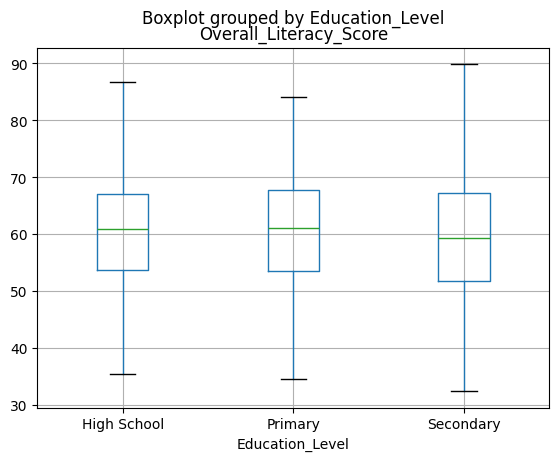

In [9]:
print(no_missing['Education_Level'].value_counts())
no_missing.boxplot('Overall_Literacy_Score', by='Education_Level')
plt.show()


ShapiroResult(statistic=0.994507231255257, pvalue=0.42861029421558045)

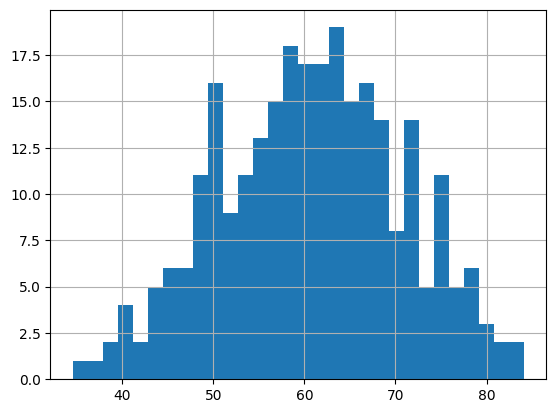

In [10]:
no_missing[no_missing['Education_Level'] == 'Primary']['Overall_Literacy_Score'].hist(bins=30)
sp.stats.shapiro(no_missing[no_missing['Education_Level'] == 'Primary']['Overall_Literacy_Score'])

ShapiroResult(statistic=0.9970185494644372, pvalue=0.8992904897560955)

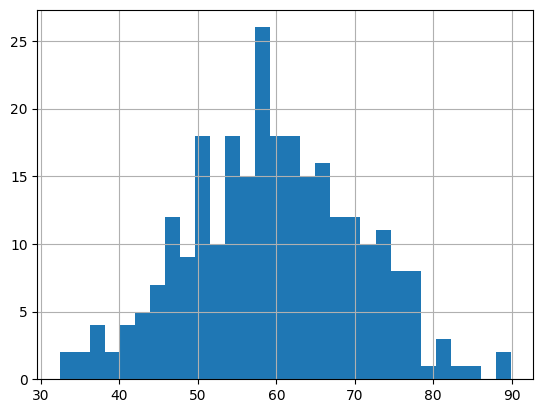

In [11]:
no_missing[no_missing['Education_Level'] == 'Secondary']['Overall_Literacy_Score'].hist(bins=30)
sp.stats.shapiro(no_missing[no_missing['Education_Level'] == 'Secondary']['Overall_Literacy_Score'])

ShapiroResult(statistic=0.9930942961822852, pvalue=0.3179495954071535)

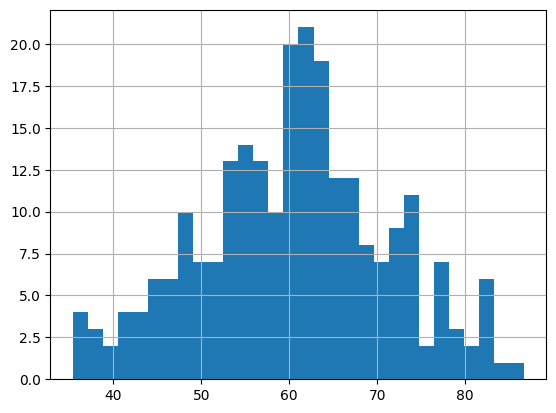

In [12]:
no_missing[no_missing['Education_Level'] == 'High School']['Overall_Literacy_Score'].hist(bins=30)
sp.stats.shapiro(no_missing[no_missing['Education_Level'] == 'High School']['Overall_Literacy_Score'])

In [13]:
model = ols('Overall_Literacy_Score ~ Education_Level', data=no_missing)
result = model.fit()
sm.api.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
Education_Level,2.0,161.122849,80.561424,0.730396,0.482045
Residual,785.0,86584.193433,110.298336,NaN,NaN


p-value > 0.05
Не можем да отхвърлим нулевата хипотеза, че няма разлика в Overall_Literacy_Score между различните образователни нива с ниво на значимост 0.05.
Няма значима разлика между различните образователни нива.

2. Има ли значима разлика в 'Overall_Literacy_Score' между различните нива на приход на домакинство?

Household_Income
Low       468
Medium    221
High       99
Name: count, dtype: int64


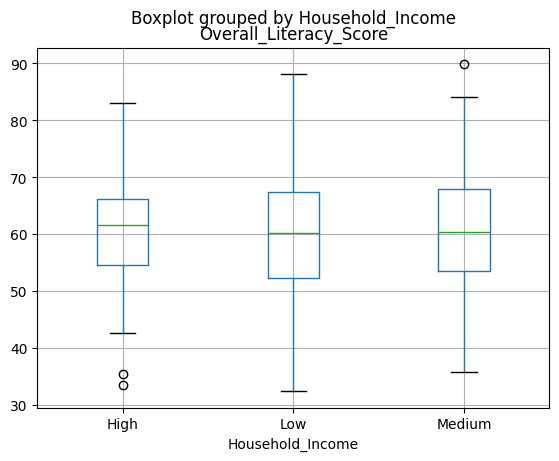

In [14]:
print(no_missing['Household_Income'].value_counts())
no_missing.boxplot('Overall_Literacy_Score', by='Household_Income')
plt.show()

ShapiroResult(statistic=0.9959987847653038, pvalue=0.2845384476993885)

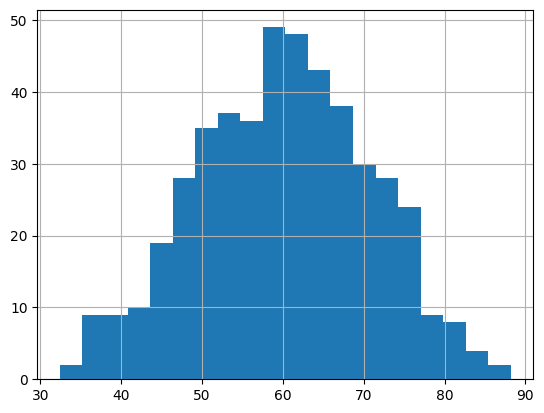

In [15]:
no_missing[no_missing['Household_Income'] == 'Low']['Overall_Literacy_Score'].hist(bins=20)
sp.stats.shapiro(no_missing[no_missing['Household_Income'] == 'Low']['Overall_Literacy_Score'])

ShapiroResult(statistic=0.9951577488085933, pvalue=0.7090002215101033)

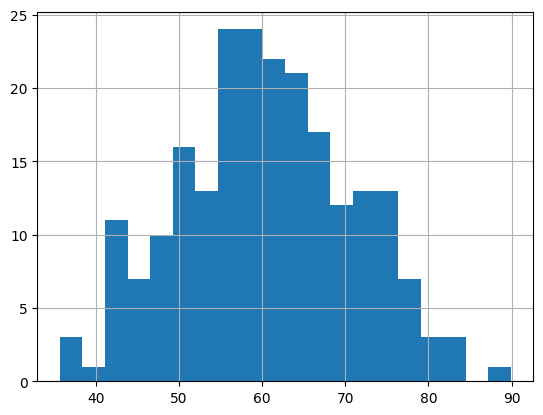

In [16]:
no_missing[no_missing['Household_Income'] == 'Medium']['Overall_Literacy_Score'].hist(bins=20)
sp.stats.shapiro(no_missing[no_missing['Household_Income'] == 'Medium']['Overall_Literacy_Score'])

ShapiroResult(statistic=0.9893296418434053, pvalue=0.6177317477542539)

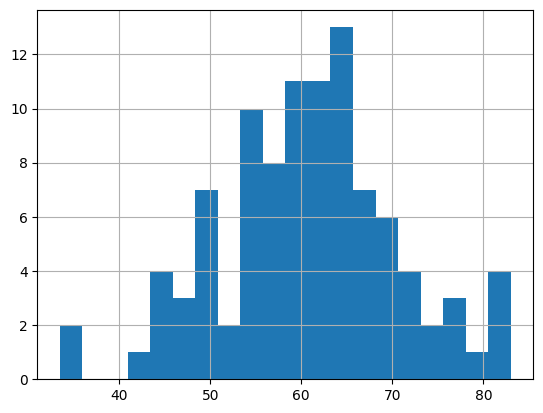

In [17]:
no_missing[no_missing['Household_Income'] == 'High']['Overall_Literacy_Score'].hist(bins=20)
sp.stats.shapiro(no_missing[no_missing['Household_Income'] == 'High']['Overall_Literacy_Score'])

In [18]:
model = ols('Overall_Literacy_Score ~ Household_Income', data=no_missing)
result = model.fit()
sm.api.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
Household_Income,2.0,41.712212,20.856106,0.188828,0.827967
Residual,785.0,86703.604070,110.450451,NaN,NaN


p-value > 0.05
Не можем да отхвърлим нулевата хипотеза, че няма разлика в Overall_Literacy_Score между различните нива на приход на домакинство с ниво на значимост 0.05.
Няма значима разлика между различните нива на приход на домакинство.

3. Кои са най-добрите предиктори за 'Overall_Literacy_Score'?

In [19]:
predictors = ['Age', 'Education_Level', 'Employment_Status', 'Household_Income', 'Location_Type',
              'Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 'Mobile_Literacy_Score',
              'Modules_Completed', 'Average_Time_Per_Module', 'Session_Count', 'Engagement_Level']
no_missing[predictors]

,Age,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Modules_Completed,Average_Time_Per_Module,Session_Count,Engagement_Level
User_ID,,,,,,,,,,,,
U0001,43,Primary,Student,Medium,Semi-Rural,25,1,33,7,15.85,12,Low
U0002,60,High School,Farmer,Low,Rural,22,14,35,9,22.24,24,Low
U0003,47,Primary,Farmer,Low,Semi-Rural,14,31,14,13,12.15,17,Low
U0004,34,Secondary,Farmer,Low,Rural,6,32,17,8,25.59,28,Medium
U0005,50,High School,Other,Medium,Rural,14,41,19,8,16.65,10,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
U0995,21,Primary,Other,Medium,Rural,26,41,44,8,18.25,12,High
U0996,30,Primary,Unemployed,Low,Rural,18,49,27,15,28.28,20,Low
U0997,30,Secondary,Student,Medium,Rural,25,24,24,13,14.06,26,Medium


In [20]:
X = no_missing[['Age', 'Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 
                'Mobile_Literacy_Score', 'Modules_Completed', 'Average_Time_Per_Module', 'Session_Count']]


#преобразуваме категориалните данни

education_level = []
for level in no_missing['Education_Level']:
    if level == 'Primary':
        education_level.append(0)
    elif level == "Secondary":
        education_level.append(1)
    else:
        education_level.append(2)
X['Education_Level'] = education_level

employment_status = []
for status in no_missing['Employment_Status']:
    if status == 'Unemployed':
        employment_status.append(0)
    elif status == "Self-Employed":
        employment_status.append(1)
    elif status == "Farmer":
        employment_status.append(2)
    elif status == "Student":
        employment_status.append(3)
    else:
        employment_status.append(4)
X['Employment_Status'] = employment_status

household_income = []
for level in no_missing['Household_Income']:
    if level == 'Low':
        household_income.append(0)
    elif level == "Medium":
        household_income.append(1)
    else:
        household_income.append(2)
X['Household_Income'] = household_income

location_type = []
for level in no_missing['Location_Type']:
    if level == 'Rural':
        location_type.append(0)
    else:
        location_type.append(1)
X['Location_Type'] = location_type

engagement_level = []
for level in no_missing['Engagement_Level']:
    if level == 'Low':
        engagement_level.append(0)
    elif level == "Medium":
        engagement_level.append(1)
    else:
        engagement_level.append(2)
X['Engagement_Level'] = engagement_level

X.loc[:,'const'] = 1
X.head()

C:\Users\smeha\AppData\Local\Temp\ipykernel_13748\2006434247.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Education_Level'] = education_level
C:\Users\smeha\AppData\Local\Temp\ipykernel_13748\2006434247.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Employment_Status'] = employment_status
C:\Users\smeha\AppData\Local\Temp\ipykernel_13748\2006434247.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,Age,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Modules_Completed,Average_Time_Per_Module,Session_Count,Education_Level,Employment_Status,Household_Income,Location_Type,Engagement_Level,const
User_ID,,,,,,,,,,,,,
U0001,43,25,1,33,7,15.85,12,0,3,1,1,0,1
U0002,60,22,14,35,9,22.24,24,2,2,0,0,0,1
U0003,47,14,31,14,13,12.15,17,0,2,0,1,0,1
U0004,34,6,32,17,8,25.59,28,1,2,0,0,1,1
U0005,50,14,41,19,8,16.65,10,2,4,1,0,1,1


In [21]:
y = no_missing['Overall_Literacy_Score']

model = sm.regression.linear_model.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Overall_Literacy_Score   R-squared:                       0.760
Model:                                OLS   Adj. R-squared:                  0.756
Method:                     Least Squares   F-statistic:                     204.2
Date:                    Sun, 16 Feb 2025   Prob (F-statistic):          2.06e-230
Time:                            13:33:52   Log-Likelihood:                -2408.6
No. Observations:                     788   AIC:                             4843.
Df Residuals:                         775   BIC:                             4904.
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Age                                0.0206      0.014      1.492      0.136      -0.007       0.048
Basic_Computer_Knowledge_Score     0.3967      0.012     32.032      0.000       0.372       0.421
Internet_Usage_Score               0.3018      0.012     24.606      0.000       0.278       0.326
Mobile_Literacy_Score              0.3168      0.012     25.550      0.000       0.292       0.341
Modules_Completed                  0.0348      0.059      0.592      0.554      -0.081       0.150
Average_Time_Per_Module           -0.0268      0.032     -0.849      0.396      -0.089       0.035
Session_Count                      0.0559      0.031      1.802      0.072      -0.005       0.117
Education_Level                    0.0088      0.229      0.038      0.969      -0.441       0.458
Employment_Status                  0.1973      0.129      1.524      0.128      -0.057       0.451
Household_Income                   0.4510      0.263      1.714      0.087      -0.066       0.968
Location_Type                      0.4768      0.407      1.171      0.242      -0.323       1.276
Engagement_Level                  -0.3624      0.260     -1.394      0.164      -0.873       0.148
const                             32.5346      1.410     23.078      0.000      29.767      35.302
==============================================================================
Omnibus:                        3.411   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.182   Jarque-Bera (JB):                2.818
Skew:                          -0.029   Prob(JB):                        0.244
Kurtosis:                       2.713   Cond. No.                         524.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Моделът описват добре данните - около 76% от тях.

Някои от предикторите са много слабо значими - брой звършени модули, средно време отделено на модул, ниво на образование, тип локация.

In [22]:
X = no_missing[['Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 'Mobile_Literacy_Score']]
X.loc[:,'const'] = 1

y = no_missing['Overall_Literacy_Score']

model = sm.regression.linear_model.OLS(y, X)
result = model.fit()
result.summary()

C:\Users\smeha\AppData\Local\Temp\ipykernel_13748\2091305457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'const'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Overall_Literacy_Score   R-squared:                       0.755
Model:                                OLS   Adj. R-squared:                  0.754
Method:                     Least Squares   F-statistic:                     805.6
Date:                    Sun, 16 Feb 2025   Prob (F-statistic):          6.34e-239
Time:                            13:33:52   Log-Likelihood:                -2416.2
No. Observations:                     788   AIC:                             4840.
Df Residuals:                         784   BIC:                             4859.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Basic_Computer_Knowledge_Score     0.3987      0.012     32.147      0.000       0.374       0.423
Internet_Usage_Score               0.3027      0.012     24.723      0.000       0.279       0.327
Mobile_Literacy_Score              0.3175      0.012     25.778      0.000       0.293       0.342
const                             34.6540      0.557     62.179      0.000      33.560      35.748
==============================================================================
Omnibus:                        3.811   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                3.094
Skew:                          -0.035   Prob(JB):                        0.213
Kurtosis:                       2.701   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Предикторите Basic_Computer_Knowledge_Score, Internet_Usage_Scorе, Mobile_Literacy_Score са най-добри. Те сами описват над 75% от данните.

4. Факторен анализ

Съдейки по имената на колоните 'Modules_Completed', 'Session_Count', 'Engagement_Level', 'Quiz_Performance', 'Feedback_Rating', може би могат да се разделят в две категории - участие в обучението ('Modules_Completed', 'Session_Count', 'Engagement_Level') и успеваемост ('Quiz_Performance', 'Feedback_Rating'). Проверяваме тези предположения с факторен анализ.

In [23]:
fa = FactorAnalysis(2, rotation='varimax')

fa_data = no_missing[['Quiz_Performance', 'Feedback_Rating', 'Modules_Completed', 'Session_Count']]
fa_data['Engagement_Level'] = engagement_level

fa.fit(fa_data)

C:\Users\smeha\AppData\Local\Temp\ipykernel_13748\3777552030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa_data['Engagement_Level'] = engagement_level


FactorAnalysis(n_components=2, rotation='varimax')

In [24]:
fa.components_

array([[-11.86551942,  -0.03559919,  -0.02102802,  -0.32653506,
         -0.03238619],
       [ -0.07634427,  -0.0322749 ,  -0.20562676,  -5.91602078,
         -0.03911047]])

In [25]:
pd.DataFrame(fa.components_.T, columns=['F' + str(i) for i in range(fa.components_.shape[0])], index=['Quiz_Performance', 'Feedback_Rating', 'Modules_Completed', 'Session_Count', 'Engagement_Level'])

,F0,F1
Quiz_Performance,-11.865519,-0.076344
Feedback_Rating,-0.035599,-0.032275
Modules_Completed,-0.021028,-0.205627
Session_Count,-0.326535,-5.916021
Engagement_Level,-0.032386,-0.039110


Категориите не се разделят ясно в две групи. Няма скрити фактори, потвърждаващи предположенията ни.